# ONETEP/ASE Tutorial

This notebook demonstrates how to run ONETEP calculations using ASE, following the tutorial.

In [1]:
from ase.calculators.onetep import Onetep, OnetepProfile
from ase.build import molecule

from pathlib import Path

from matplotlib import pyplot as plt

In [2]:
profile = OnetepProfile(
    command="../../_static/launch_onetep.sh",
    pseudo_path="../../_static/pseudos"
)

In [3]:
silane = molecule('SiH4', vacuum=8.0)

calc_dir = Path('t1_onetep_silane')
calc_dir.mkdir(exist_ok=True)

## Silane molecule

In [4]:
# Set up the ONETEP calculator
calc = Onetep(
    keywords={
        'task': 'SinglePoint',  
        'cutoff_energy': '300 eV',
    },
    ngwf_count={'Si': 4, 'H': 1}, 
    ngwf_radius={'Si': 6.0, 'H': 6.0},
    pseudopotentials={'Si': 'Si_ONCV_PBE-1.2.upf', 'H': 'H_ONCV_PBE-1.2.upf'},
    profile=profile,
    directory=calc_dir
)

silane.calc = calc

# Run the calculation
energy = silane.get_potential_energy()

## Convergence tests

Test convergence with respect to:
- Cutoff energy 
- NGWF radius

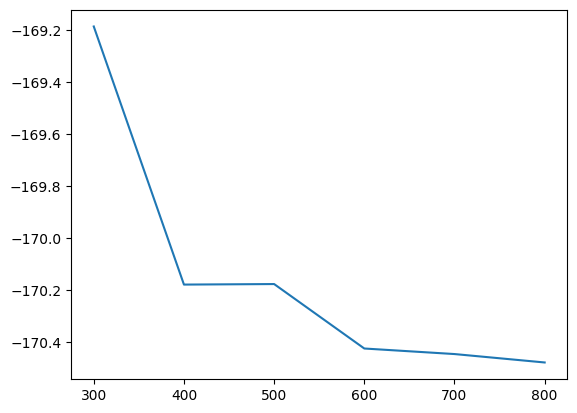

In [12]:
cutoff_energies = [300, 400, 500, 600, 700, 800]  # eV
total_energies = []

for cutoff in cutoff_energies:
    calc = Onetep(
        keywords={
            'task': 'SinglePoint',  
            'cutoff_energy': f'{cutoff} eV',
        },
        ngwf_count={'Si': 4, 'H': 1}, 
        ngwf_radius={'Si': 6.0, 'H': 6.0},
        pseudopotentials={'Si': 'Si_ONCV_PBE-1.2.upf', 'H': 'H_ONCV_PBE-1.2.upf'},
        profile=profile,
        directory=calc_dir
    )
    silane.calc = calc
    energy = silane.get_potential_energy()
    total_energies.append(energy)


# Plot total energy vs cutoff energy
plt.plot(cutoff_energies, total_energies)
plt.xlabel('cutoff energy (eV)')
plt.ylabel('total energy (eV)')
plt.show()

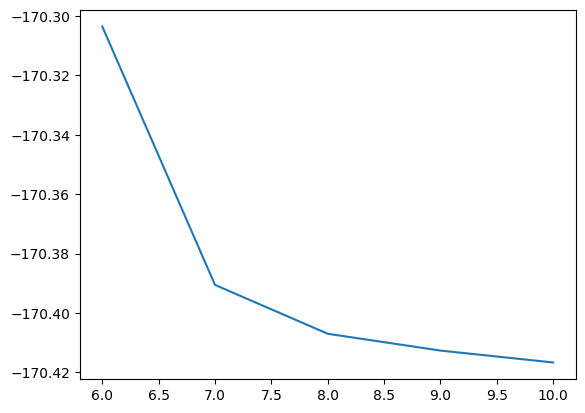

In [10]:
ngwf_radii = [6.0, 7.0, 8.0, 9.0, 10.0]  # bohr
total_energies = []

for radius in ngwf_radii:
    calc = Onetep(
        keywords={
            'task': 'SinglePoint',  
            'cutoff_energy': f'500 eV',
        },
        ngwf_count={'Si': 4, 'H': 1}, 
        ngwf_radius={'Si': radius, 'H': radius},
        pseudopotentials={'Si': 'Si_ONCV_PBE-1.2.upf', 'H': 'H_ONCV_PBE-1.2.upf'},
        profile=profile,
        directory=calc_dir
    )
    silane.calc = calc
    energy = silane.get_potential_energy()
    total_energies.append(energy)

plt.plot(ngwf_radii, total_energies)
plt.xlabel('NGWF radius (bohr)')
plt.ylabel('total energy (eV)')
plt.show()

## Crystalline silicon

In [1]:
# This example does NOT converge, until then we comment it out.

#from ase.build import bulk
#
## Build a 2x2x2 silicon supercell 
#si_supercell = bulk('Si', 'diamond', a=5.430, cubic=True) * (2, 2, 2)
#
## Set up the ONETEP calculator
#calc = Onetep(
#    keywords={
#        'cutoff_energy': '900 eV',
#        'ngwf_cg_max_step': 8.0,
#        'maxit_ngwf_cg': 30,
#        'write_forces': True,
#        "forces_output_detail": "verbose"
#    },
#    ngwf_count={'Si': 4}, 
#    ngwf_radius={'Si': 8.0},
#    pseudopotentials={'Si': 'Si_ONCV.upf'},
#    profile=profile
#)
#
#si_supercell.calc = calc
#
## Run the calculation
#forces = si_supercell.get_forces()
#
#print(forces)